In [2]:
# Import pandas
import pandas as pd
import geopandas
import geoplot
import numpy as np
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [3]:
# Load in the listings data
df=pd.read_csv('data/listings.csv')

df.describe


<bound method NDFrame.describe of              id                                               name    host_id  \
0          2595                              Skylit Midtown Castle       2845   
1          3831  Whole flr w/private bdrm, bath & kitchen(pls r...       4869   
2          5121                                    BlissArtsSpace!       7356   
3          5136           Spacious Brooklyn Duplex, Patio + Garden       7378   
4          5178                   Large Furnished Room Near B'way　       8967   
...         ...                                                ...        ...   
46522  44807522         Designer Gramercy Studio Townhouse by UNSQ   12941925   
46523  44807786  Cozy & comfy apt in the heart of Inwood Manhattan  284790520   
46524  44811717  Comfortable safe environment 24hr security camera  362453686   
46525  44814944                 Upper West Side studio 86th Street    4039777   
46526  44818009  5MIN D/N trains, NEAR THE BEACH, 50’ TO MANHATTAN   480982

####  Exercise 1: Create a bar chart and dataframe of top 10 Neigborhoods that have the most expensive listsings on average. 
Our goal is to make a chart reflecting the top 10 most expensive Neighborhoods.
This is a little dubious - we assign "expensive" by calculating the average cost of 
an AirBnB in each neighborhood.

1. Make a dataframe that sorts the neighborhood field by decending price.  
1. Use head to cut back top the top 10
1. Use pandas.plot.barh to generate a histogram (see [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html) wiki for details on pandas.plot.barh)
1. Display the data that you used to create the bar chart as a table with neighborhood and average price as the columns.  You want this to match the pivot that you create in youur dashboard

In [18]:
# our goal is to make a chart reflecting the top 10 most expensive Neighborhoods
# This is a little dubious - we assign "expensive" by calculating the average cost of 
# an AirBnB in each neighborhood, then we take the top ten and weight each slice 
# by the average value.
#
# make a dataframe that sorts the neighborhood field by decending price.  
# Use head to cut back top the top 10. Then, use df.plot.barh to generate a histogram.

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors
from matplotlib.ticker import PercentFormatter



neighborhood_avg_price = df.groupby('neighbourhood')['price'].mean().round(2)

sorted_neighborhoods = neighborhood_avg_price.sort_values(ascending=False)

top_10_neighborhoods = sorted_neighborhoods.head(10)


print(top_10_neighborhoods)

# top_10_neighborhoods.plot.barh(legend=False)
# plt.title('Top 10 Most Expensive Neighborhoods by Average Price')
# plt.xlabel('Average Price')
# plt.ylabel('Neighborhood')
# plt.gca().invert_yaxis()
# plt.show()




neighbourhood
Fort Wadsworth        800.00
Woodrow               700.00
Sea Gate              418.23
Tribeca               381.11
Flatiron District     367.42
Briarwood             366.16
Financial District    335.39
Willowbrook           309.00
Tottenville           309.00
Prince's Bay          300.00
Name: price, dtype: float64


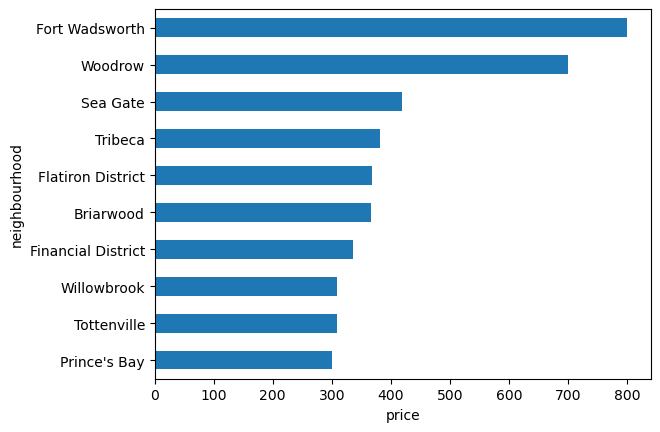

In [30]:
# Now, display the top 10 datframe you created as a table with columns
# neighbourhood and price
top_10_neighborhoods.plot(kind='barh', x='Average Price', y='Neighborhood',ylabel='neighbourhood', xlabel="price")
plt.gca().invert_yaxis()
plt.show()





####  Exercise 2: Create a bar chart and dataframe of top 10 Neigborhoods that have the LEAST expensive listsings on average. 

Do the same thing you just did, but get the 10 least expensive neighborhoods.  Sort them from lowest average price to highest.  Bew wure to provide a pivot table.

In [21]:
# Here we make the same chart using the bottom 10 Neighborhoods
# by average price.  We sort ascending in this one.

neighborhood_avg_price = df.groupby('neighbourhood')['price'].mean()

bottom_10_neighborhoods = neighborhood_avg_price.sort_values(ascending=True).head(10).round(2)

print(bottom_10_neighborhoods)



neighbourhood
South Beach                   45.00
Bull's Head                   49.67
Port Richmond                 51.22
Soundview                     52.06
New Brighton                  52.25
Bay Terrace, Staten Island    55.00
Hunts Point                   56.58
University Heights            57.83
Grant City                    58.40
Olinville                     59.43
Name: price, dtype: float64


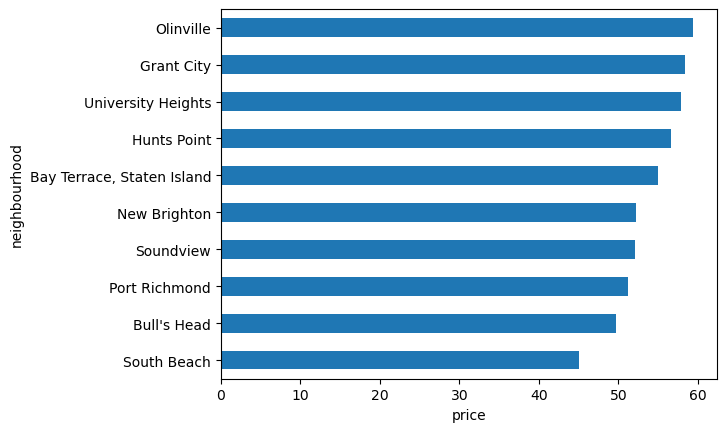

In [29]:
# we also would like to have the corresponding pivot table of the lowest 10


bottom_10_neighborhoods.plot(kind='barh', x='Average Price', y='Neighborhood',ylabel='neighbourhood', xlabel="price")



plt.show()



#  Now make all four widgets (the two charts and the two dataframes) in a Tableau dashboard!